In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch
from diffusers import FluxKontextPipeline
from diffusers.utils import load_image
from FLUX_kontext import generate, SpotEditConfig


2025-12-19 17:17:13.343809: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-19 17:17:13.398478: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-19 17:17:14.968893: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
pipe = FluxKontextPipeline.from_pretrained('black-forest-labs/FLUX.1-Kontext-dev', torch_dtype=torch.bfloat16).to('cuda')

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers
`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
image = load_image('/home/svu/e1352224/workspace/kv-cache/spotedit/asset/dog.jpg')
image = image.resize((1024, 1024))

In [ ]:
config = SpotEditConfig(threshold=0.2)

In [15]:
res = generate(
    pipe,
    image = image,
    prompt = 'add a scarf to the dog',
    config = config,
    num_inference_steps=50,
    guidance_scale=7.5,
)

  0%|          | 0/50 [00:00<?, ?it/s]

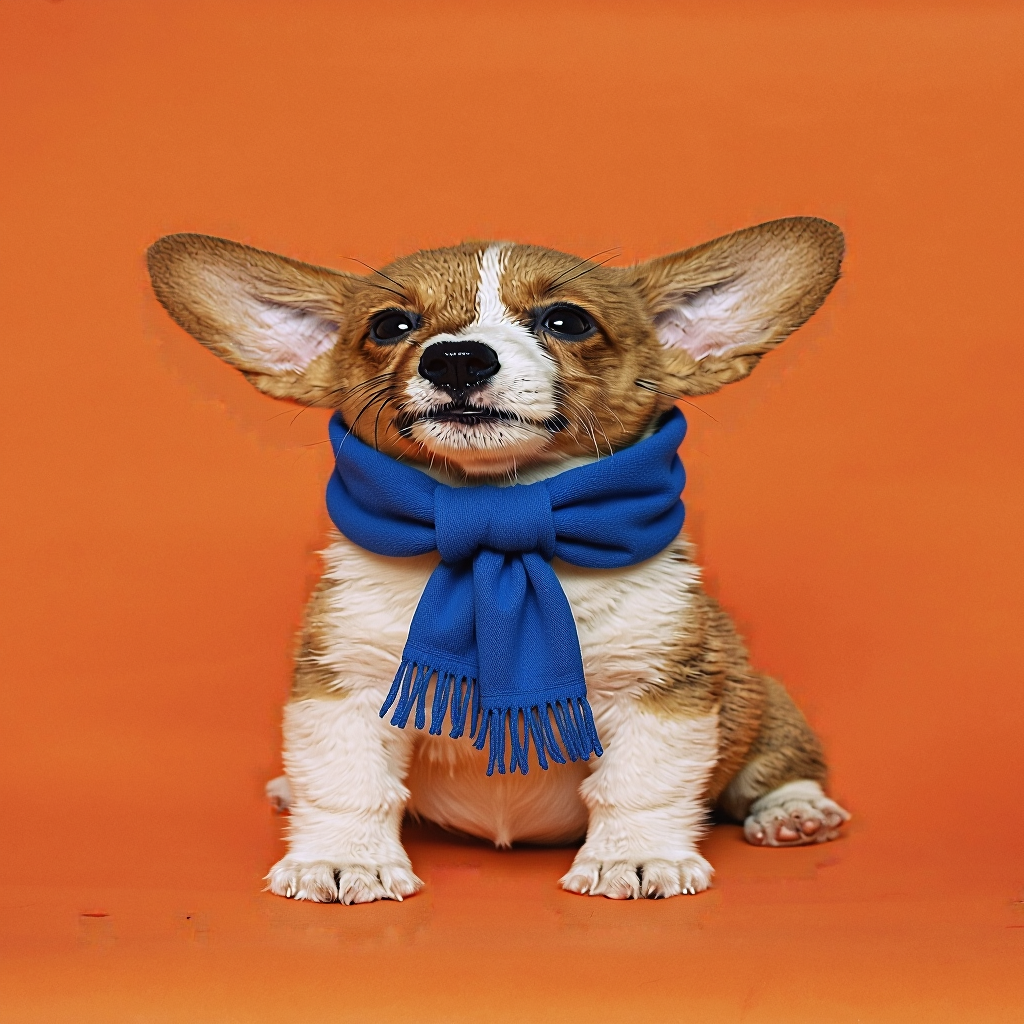

In [ ]:
res.images[0]